In [46]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')



# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import xlrd
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import nltk

In [3]:
#!pip install xlrd

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop= stopwords.words('english')
stop.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [6]:
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    if doc is not None:
      stop_free = " ".join([i for i in str(doc).lower().split() if i not in stop])
      punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
      normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
      return normalized
    else:
      return doc

In [16]:


file_path = ("capstone dataset.xlsx")
data = pd.read_excel(file_path, sheet_name='Not electricians')

In [17]:
data['DESCRIPTION'].isnull().value_counts()

False    457
True       7
Name: DESCRIPTION, dtype: int64

In [18]:
data.DESCRIPTION.dropna()

0      I'am a professional in late 20's with 7 years ...
1      We are professional removalists dedicated for ...
2      Structural engineer , Removal work and online ...
3      After 1 full year and 500 plus 5 star reviews ...
4                       Car repair, service and diagnose
                             ...                        
459    I'm a reliable man with a toyota van ready to ...
460    " I have been in the Tiling for over 12years a...
461       Professional industraial and domestic Cleaner.
462    S&J Construction Group Are Kilsyth Based const...
463    WE SPECIALISE IN A WIDE RANGE OF BOAT REPAIRS,...
Name: DESCRIPTION, Length: 457, dtype: object

In [19]:
data[(data.DESCRIPTION == ' ')].index.tolist()

[]

In [20]:
data

,Name,ADDRESS,SUBURB,POSTCODE,LICENCE INFO PROVIDED,LICENCE INFO,LICENCE NUMBER,DESCRIPTION,RATING,Reviews,DATE,WEBSITE,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Kasun Dananjaya D,"BOX HILL VIC, AUSTRALIA",BOX HILL,3128,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,I'am a professional in late 20's with 7 years ...,4.8,199,2021-04-22,Airtasker,NaN,NaN,NaN
1,Nishita R,"BOX HILL VIC, AUSTRALIA",BOX HILL,3128,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,We are professional removalists dedicated for ...,4.8,6,2021-09-29,Airtasker,NaN,NaN,NaN
2,Rishy S,"BOX HILL VIC, AUSTRALIA",BOX HILL,3128,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,"Structural engineer , Removal work and online ...",4.9,1166,2021-09-29,Airtasker,NaN,NaN,NaN
3,N S,"BOX HILL VIC 3128, AUSTRALIA",BOX HILL,3128,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,After 1 full year and 500 plus 5 star reviews ...,5,532,2021-09-01,Airtasker,NaN,NaN,NaN
4,Nemecio B,"BOX HILL SOUTH VIC, AUSTRALIA",BOX HILL SOUTH,3128,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,"Car repair, service and diagnose",5,24,2021-04-15,Airtasker,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,James Clifford D,"OAKLEIGH SOUTH VIC, AUSTRALIA",OAKLEIGH SOUTH,3167,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,I'm a reliable man with a toyota van ready to ...,5,302,2021-09-12,Airtasker,NaN,NaN,NaN
460,Hadi Q,"OAKLEIGH VIC, AUSTRALIA",OAKLEIGH,3166,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,""" I have been in the Tiling for over 12years a...",5,90,2021-09-26,Airtasker,NaN,NaN,NaN
461,Sham T,"OAKLEIGH EAST VIC 3166, AUSTRALIA",OAKLEIGH EAST,3166,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,Professional industraial and domestic Cleaner.,5,10,2021-09-29,Airtasker,NaN,NaN,NaN
462,Joshua Matthews,"221 COLCHESTER ROAD, KILSYTH VIC",KILSYTH,3137,"Not electrician, but performed electric task","Not electrician, but performed electric task",NaN,S&J Construction Group Are Kilsyth Based const...,4,NaN,2021-09-25,Gumtree,NaN,NaN,NaN


# Tokenize Sentences and Clean

In [21]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [24]:
data_list = data.DESCRIPTION.values.tolist()
data_list

["I'am a professional in late 20's with 7 years plus experience in domestic, commercial cleaning working for reputed companies over the years. Mainly a professional window cleaner. Im new to air tasker but not new to the cleaning industry.",
 'We are professional removalists dedicated for tasks such as loading and unloading, packing and unpacking, dismantling and reassembling.We have the latest equipment, tools and vehicles which are needed for a successfully smooth move.We are reliable removalist offers you complete moving service with disassembling and reassembling service of your furniture. We are qualified removalist whom you have hired is an expert in doing this type of work.Also, when it comes to disassembling and reassembling the furniture, we can do that easily, irrespective on the number, shape, size and weight of the furniture.',
 'Structural engineer , Removal work and online Tutoring We provide the following services on Airtasker *House and apartment moving* Furniture assem

In [25]:
electric_data = data['DESCRIPTION']
doc_clean = [clean(doc).split() for doc in electric_data] 
dictionary = corpora.Dictionary(doc_clean) 
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [26]:
base_model_lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.ldamodel.LdaModel(corpus = corpus, 
                          id2word = dictionary,
                          num_topics = 4,
                          passes = 50)

In [27]:
ldamodel[corpus]

create four topics for lda model

In [29]:
pprint(ldamodel.print_topics())

[(0,
  '0.010*"job" + 0.010*"work" + 0.010*"service" + 0.007*"furniture" + '
  '0.007*"removal" + 0.006*"experience" + 0.006*"year" + 0.006*"moving" + '
  '0.006*"u" + 0.006*"delivery"'),
 (1,
  '0.012*"im" + 0.009*"year" + 0.008*"job" + 0.008*"experience" + 0.007*"work" '
  '+ 0.007*"business" + 0.005*"property" + 0.004*"task" + 0.004*"small" + '
  '0.004*"service"'),
 (2,
  '0.028*"cleaning" + 0.011*"service" + 0.008*"clean" + 0.007*"removal" + '
  '0.007*"professional" + 0.007*"work" + 0.006*"year" + 0.006*"task" + '
  '0.006*"job" + 0.006*"gardening"'),
 (3,
  '0.008*"experience" + 0.007*"year" + 0.007*"job" + 0.007*"working" + '
  '0.006*"service" + 0.006*"boat" + 0.006*"business" + 0.004*"work" + '
  '0.004*"offer" + 0.004*"repair"')]


In [30]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9707,"cleaning, service, clean, removal, professiona...","[iam, professional, late, 20, 7, year, plus, e..."
1,1,0.0,0.9830,"job, work, service, furniture, removal, experi...","[professional, removalists, dedicated, task, l..."
2,2,1.0,0.5680,"im, year, job, experience, work, business, pro...","[structural, engineer, removal, work, online, ..."
3,3,2.0,0.9831,"cleaning, service, clean, removal, professiona...","[1, full, year, 500, plus, 5, star, review, wo..."
4,4,3.0,0.8441,"experience, year, job, working, service, boat,...","[car, repair, service, diagnose]"
5,5,0.0,0.9899,"job, work, service, furniture, removal, experi...","[call0140, click, revealopen, 7, days7am, 9pma..."
6,6,0.0,0.8460,"job, work, service, furniture, removal, experi...","[reliable, service, affordable, price]"
7,7,3.0,0.9916,"experience, year, job, working, service, boat,...","[stop, paying, exorbitant, dealer, charge, usu..."
8,8,0.0,0.9909,"job, work, service, furniture, removal, experi...","[mini, excavator, hire, bendigo, regionthis, 1..."
9,9,2.0,0.6265,"cleaning, service, clean, removal, professiona...","[beat, anyone‚s, quote, price, sameday, quote,..."


 In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

# Frequency Distribution of Word Counts in Documents

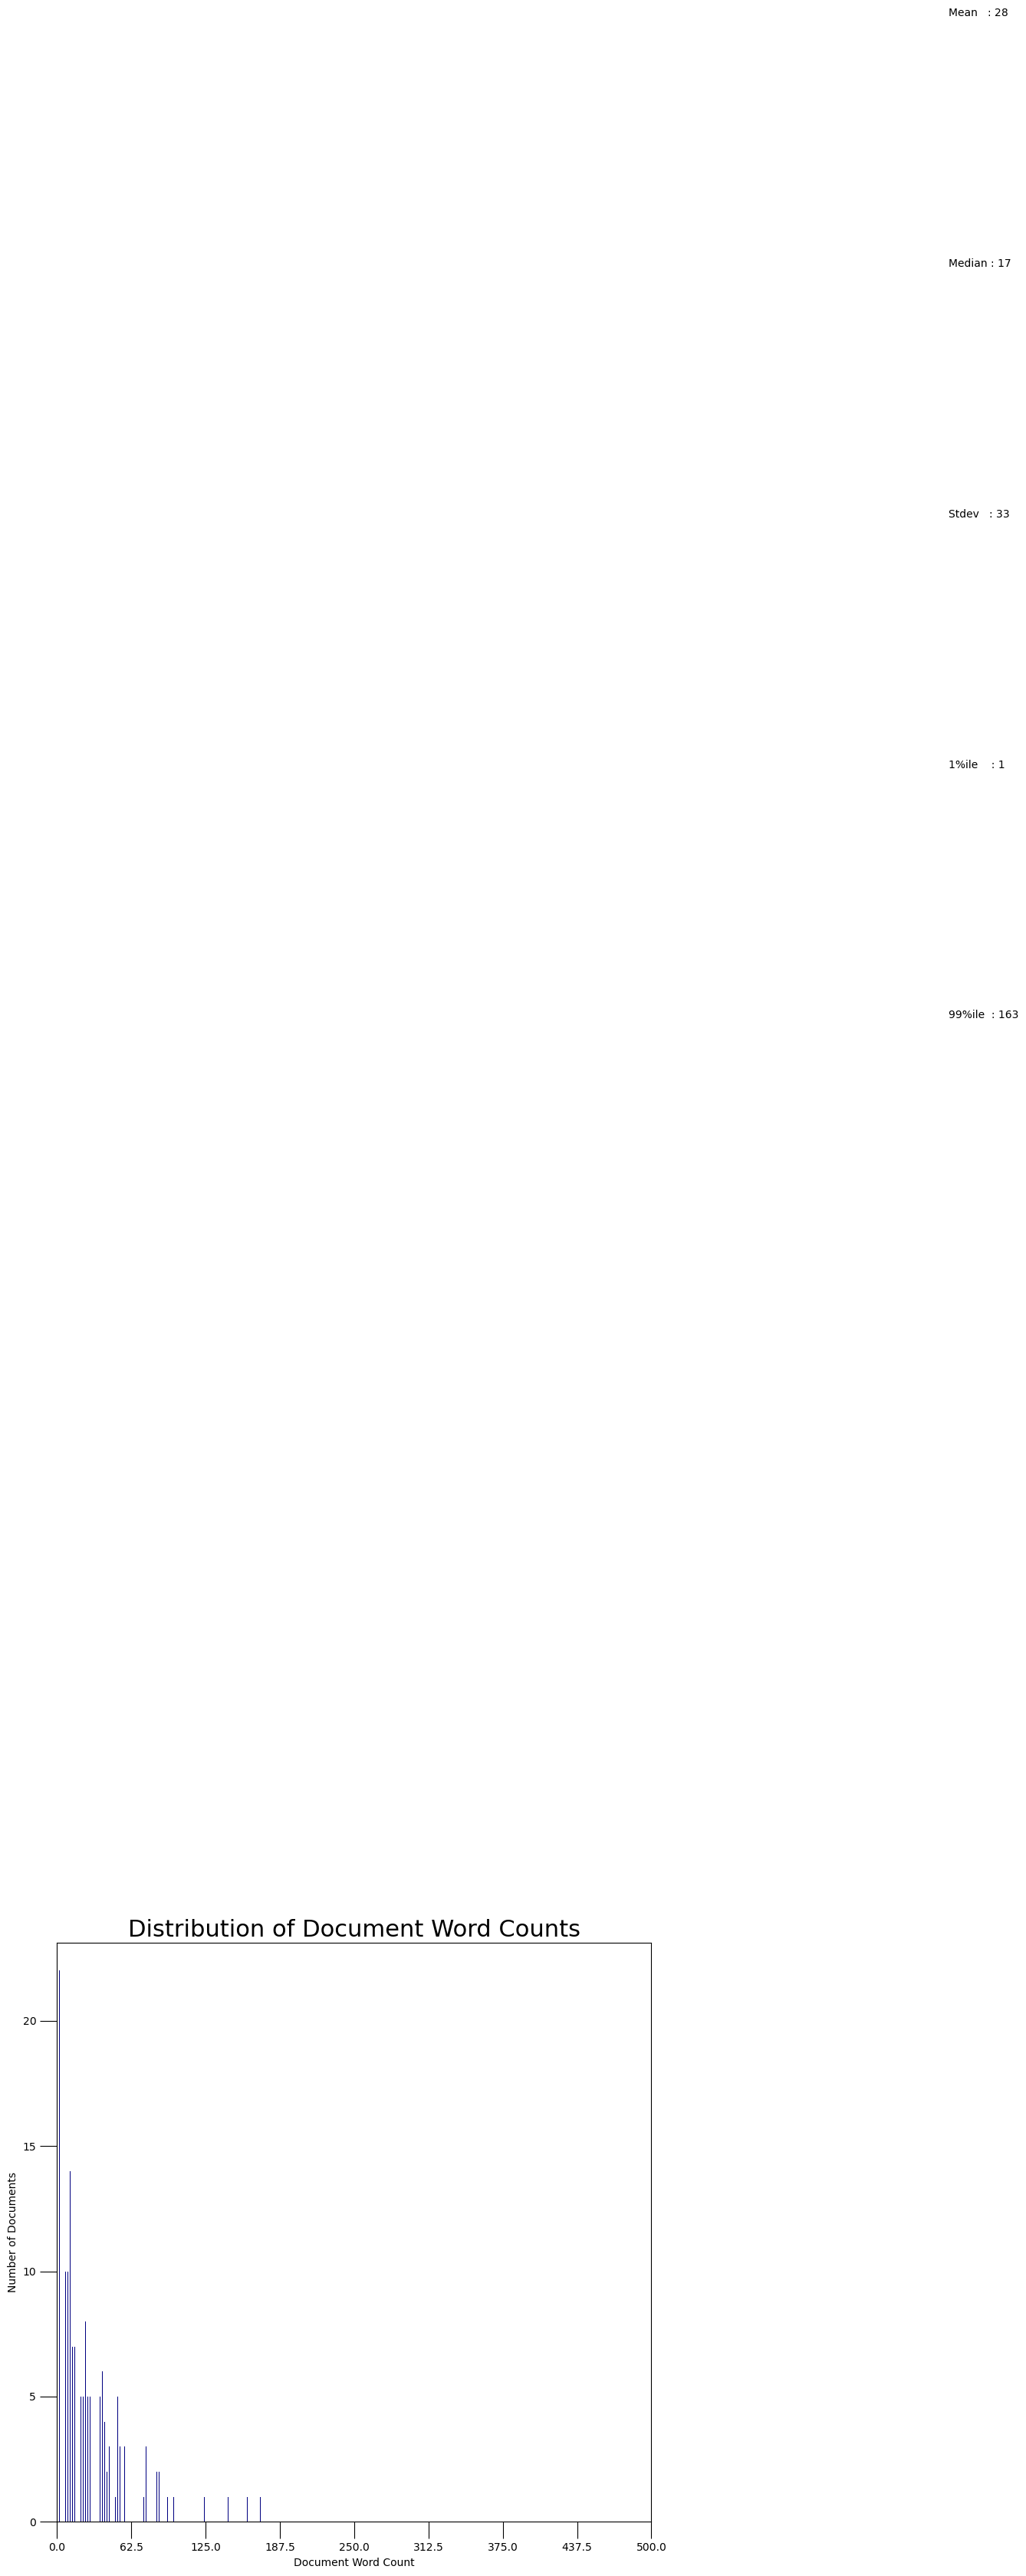

In [32]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,10), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,500,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

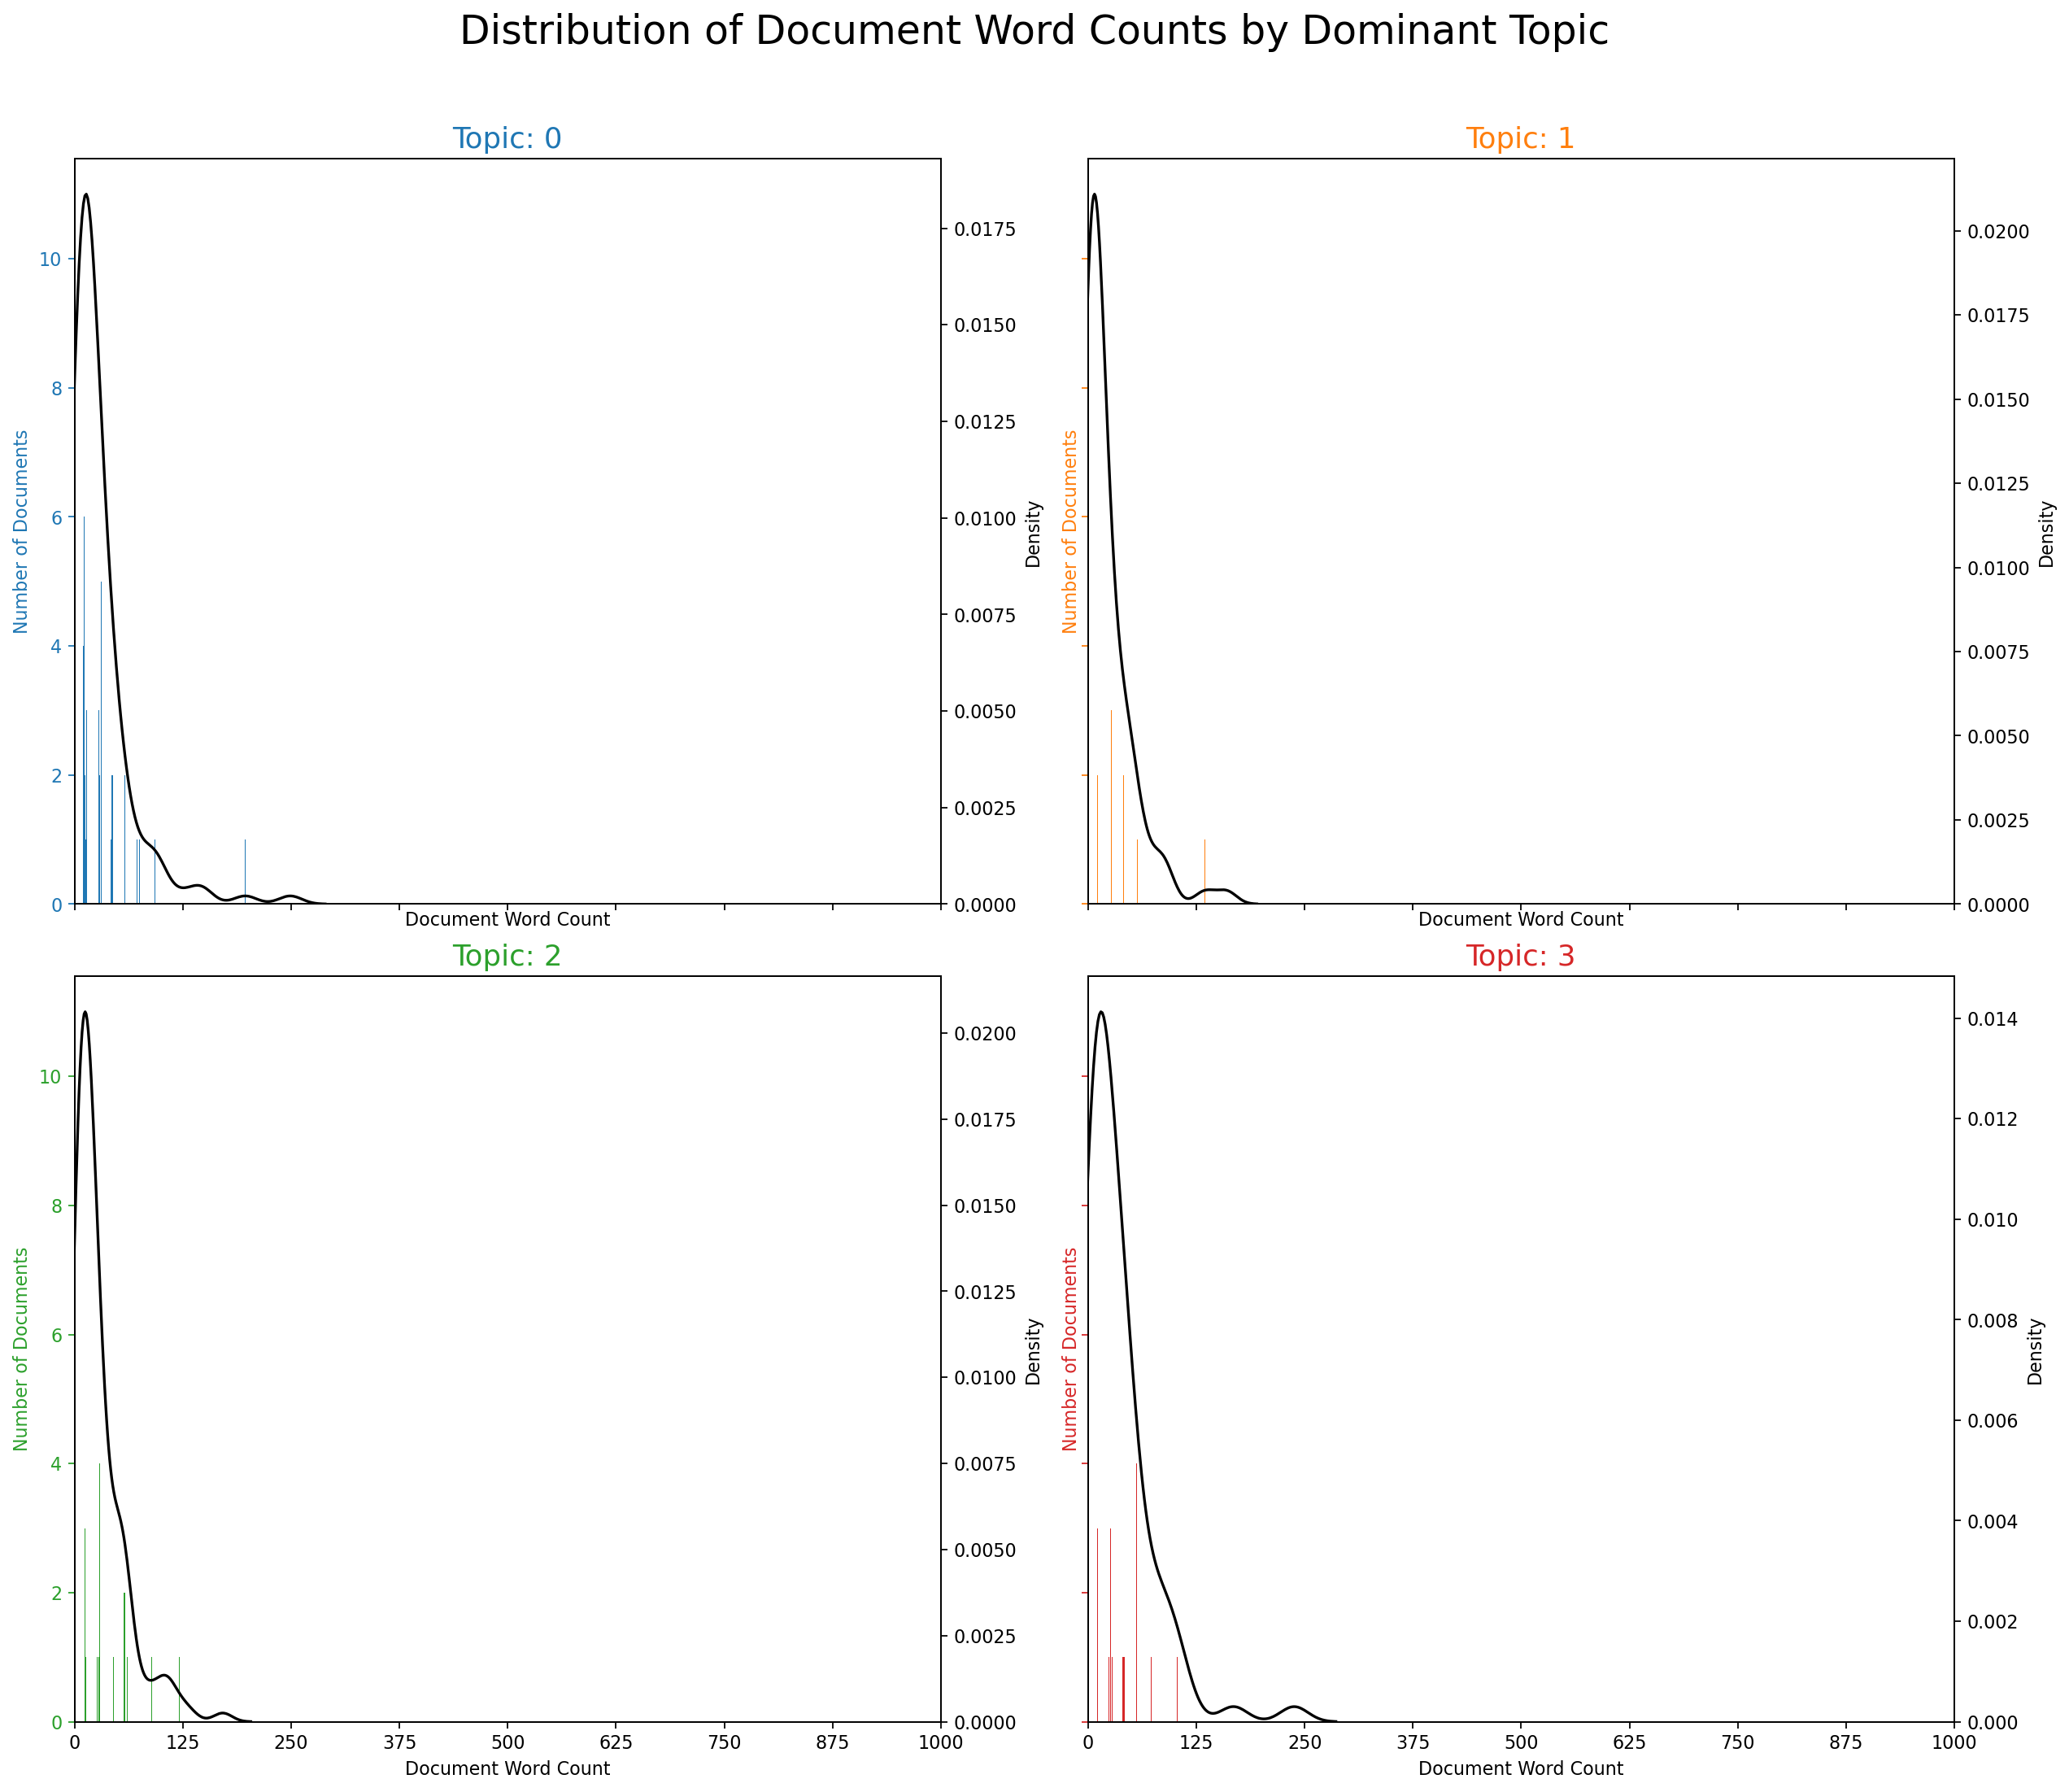

In [33]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

In [34]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more

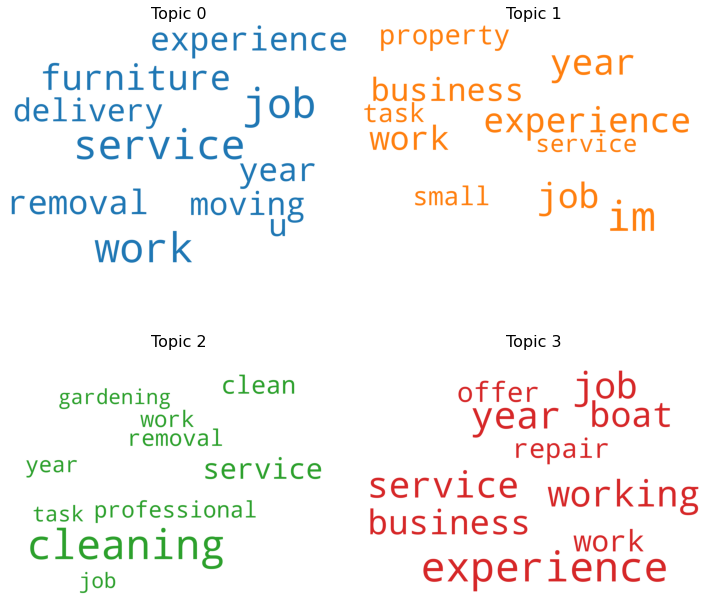

In [35]:
cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# word counts for topic keywords

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-41-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-41-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipyth

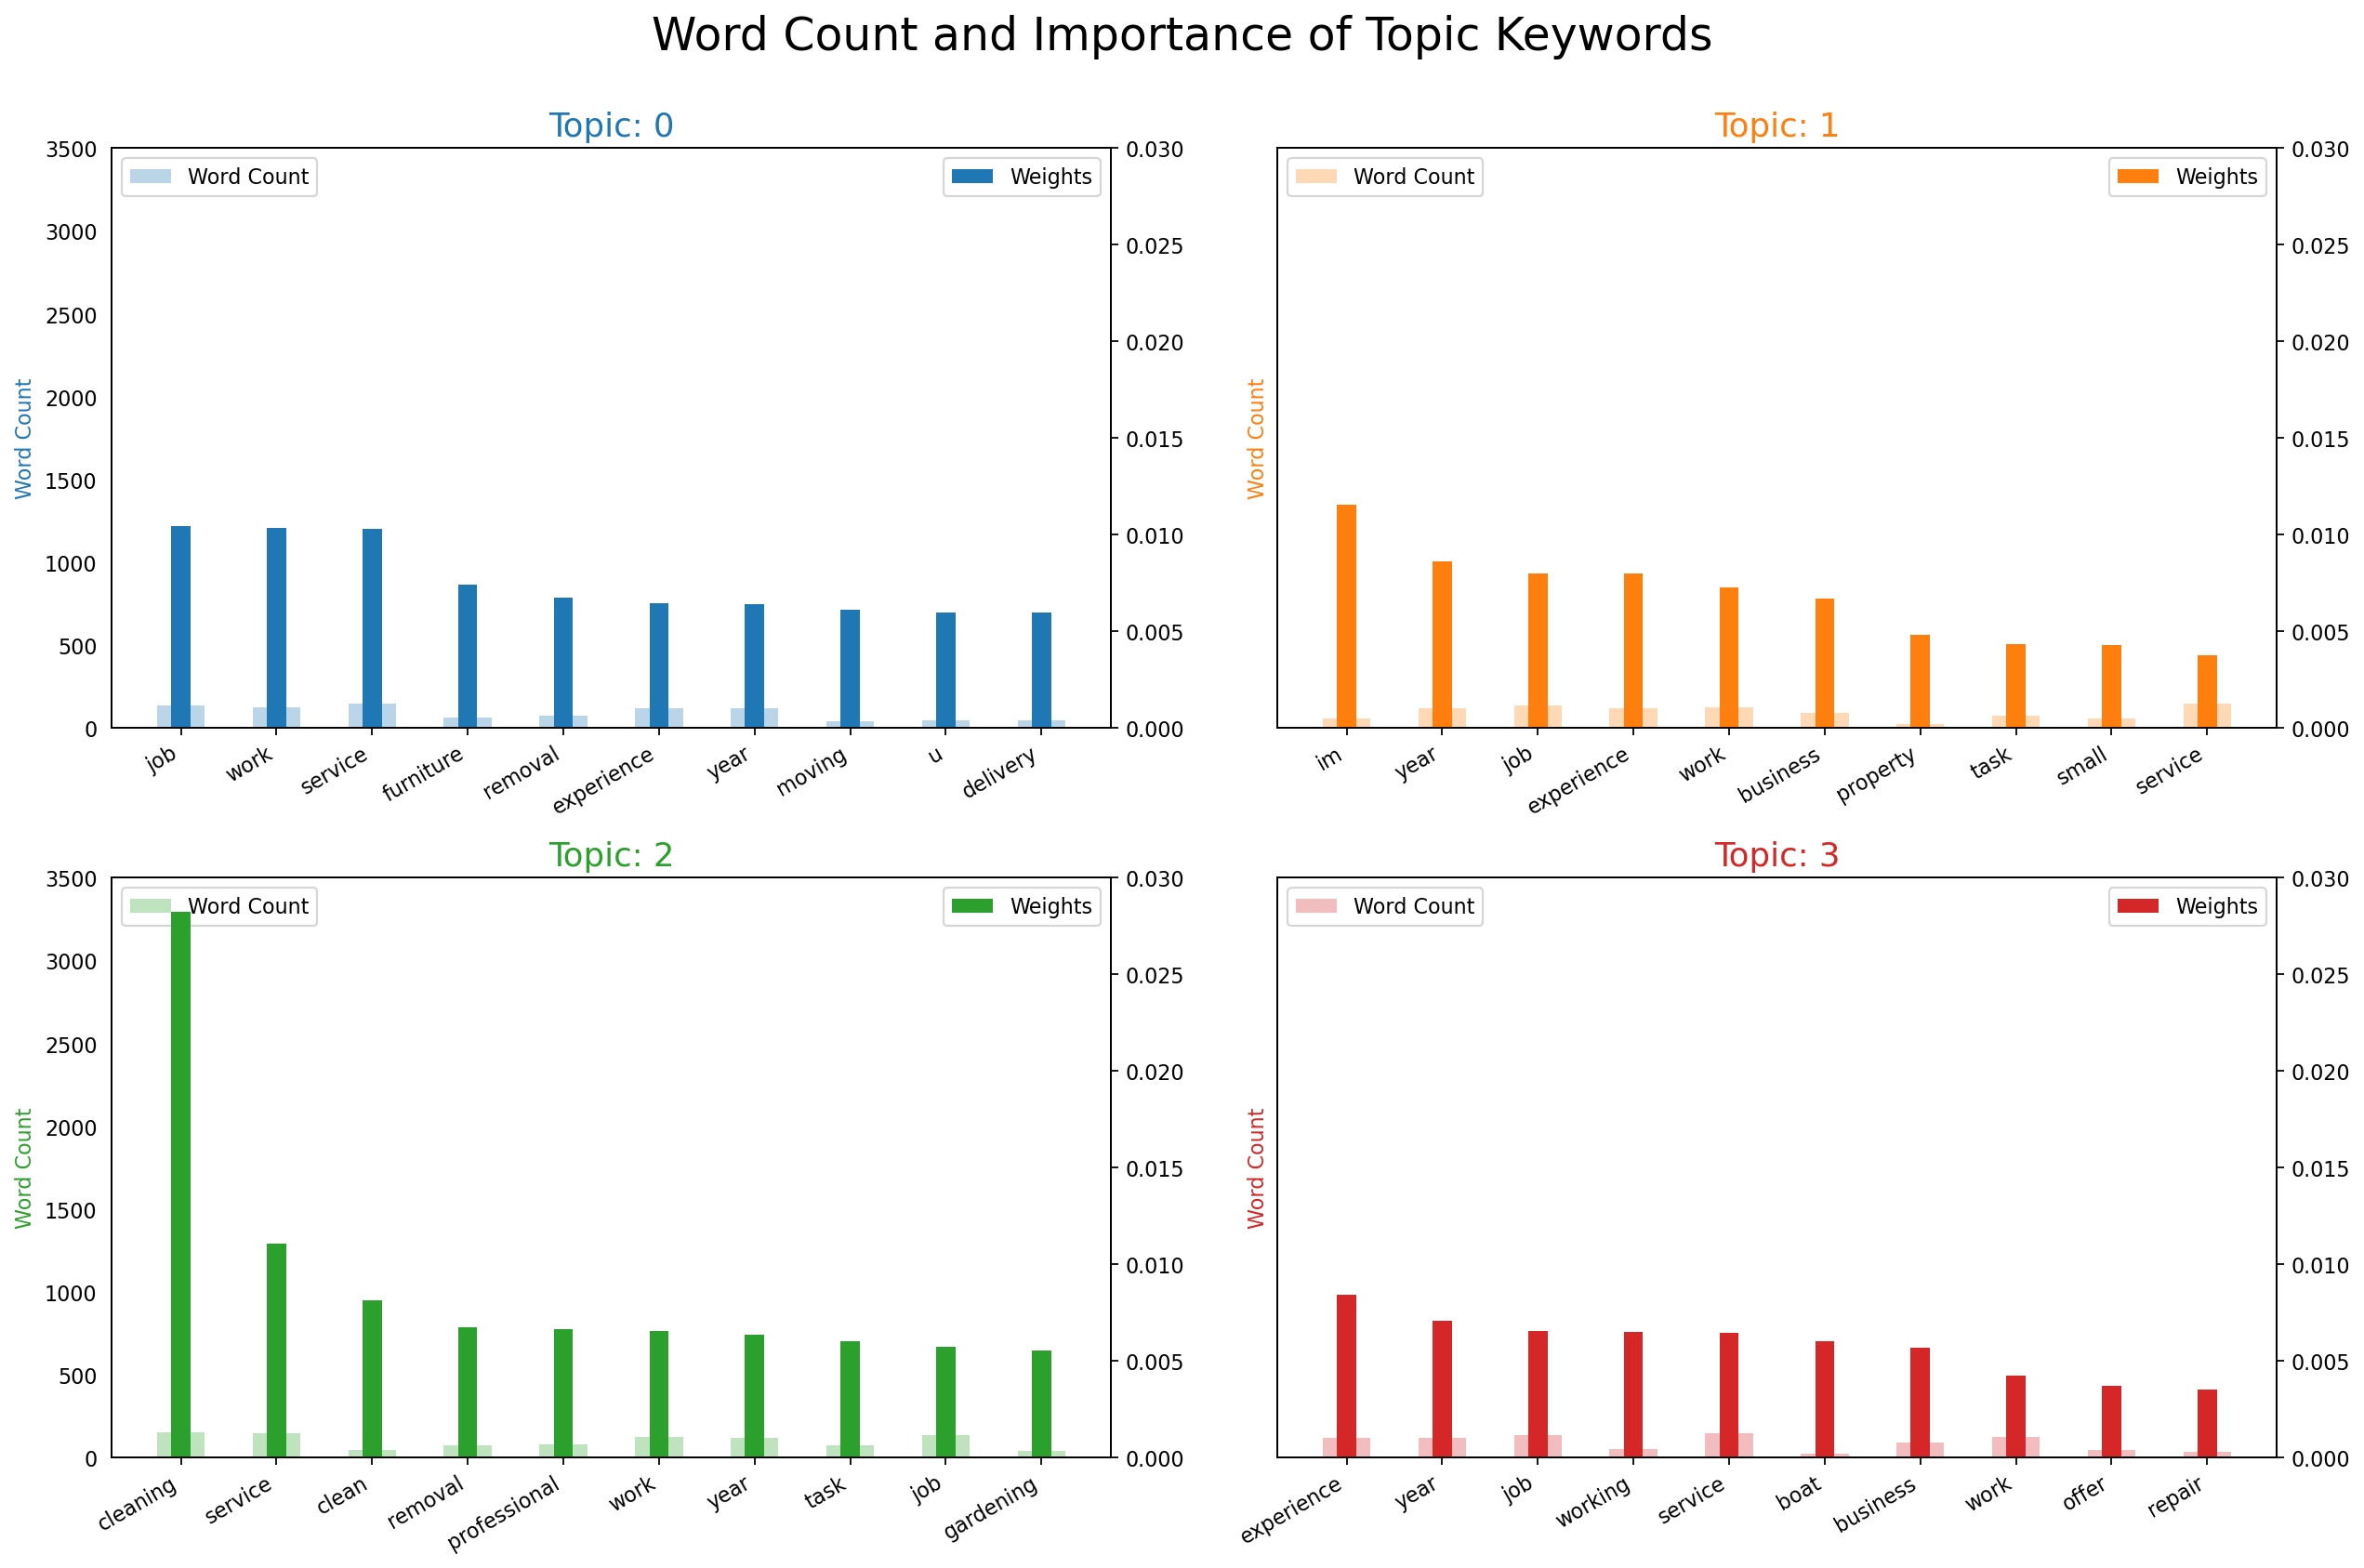

In [41]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# t-SNE Clustering Chart

In [37]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

# pyLDAVis

In [38]:
import pyLDAvis.gensim_models


In [42]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.102492  0.048160       1        1  32.115436
0     -0.037255 -0.094881       2        1  31.844613
3      0.088582 -0.026440       3        1  20.342983
1      0.051165  0.073161       4        1  15.696969, topic_info=           Term        Freq       Total Category  logprob  loglift
4      cleaning  119.000000  119.000000  Default  30.0000  30.0000
10           im   39.000000   39.000000  Default  29.0000  29.0000
474       clean   37.000000   37.000000  Default  28.0000  28.0000
344        boat   17.000000   17.000000  Default  27.0000  27.0000
1017      lease   22.000000   22.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
445    building    5.714918   21.131157   Topic4  -5.8833   0.5440
326    painting    6.136112   29.706699   Topic4  -5.8122   0.2745
47      service    7.710808  114.074578   Topic4  -5.5837  -0.8425
53         tool    5.547730   24.719677   Topic4  -5.9130   0.3575
61    airtasker    5.532980   26.134999   Topic4  -5.9156   0.2992

[308 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
736       1  0.759142   100
736       2  0.175187   100
736       4  0.116791   100
4220      3  0.920503  17ft
0         1  0.266346    20
...     ...       ...   ...
21        3  0.211838  year
21        4  0.200688  year
4129      1  0.949645   ôå∂
3503      2  0.987822   ‚ôö
3907      4  0.484158  üîü

[540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [54]:
electric_data

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      We are a small electrical business with decade...
1      Need a qualified electrician/heating and cooli...
2      Years in business: 36\nNumber of employees: 3\...
3      All types of Electrical Works\nIndustrial, Com...
6                               Contractor's Lic # 30614
                             ...                        
631    Over 30 years ICT experience. Cisco certified....
632    Hello,\nI have plenty of experience in DIY stu...
633    Hi I‚Äôm Jarrod. \nI am a refrigeration and ai...
634    I own a local, family owned electrical busines...
635    [Content Moderated] is a registered electrical...
Name: Description, Length: 615, dtype: object

In [40]:
def predict(new_text):
  if new_text is not None and str(new_text).strip() != '':
    cleaned_data = clean(new_text).split()
    bow_vector = dictionary.doc2bow(cleaned_data)
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    for index, score in sorted(ldamodel[bow_vector], key=lambda tup: -1*tup[1]):
      res = preprocess_string(ldamodel.print_topic(index, 5), filters)
      return res
  else:
    return None

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
for d in electric_data:
  print(predict(d))

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['xd', 'job', 'repair', 'time', 'work']
['electrical', 'electric

['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['xd', 'job', 'repair', 'time', 'work']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['xd', 'job', 'repair', 'time', 'work']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'electrician', 'work', 'year', 'service']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']
['electrical', 'installation', '‚ä¢', 'service', 'lighting']
['work', 'experience', 'installation', 'car', 'job']


In [43]:
coherence_model_lda = CoherenceModel(model=ldamodel, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score: ', coherence_lda)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Coherence Score:  0.31759537134013094


In [44]:
coherence_model_lda

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
coherence_model_multicore = CoherenceModel(model=lda_model_multi, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_multicore = coherence_model_multicore.get_coherence()
print('\nMulticore Coherence Score: ', coherence_multicore)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'lda_model_multi' is not defined